## Notebook: Ptychography reconstruction with positions update from a CXI dataset
This notebook uses the the runner API (`pynx.ptycho.runner`) to load the data and prepare the optimisation.

This is what is used for the command-line scripts, here we just grap the Ptycho object from the runner.

This uses a dataset recorded on id01@ESRF, which exhibits some position distortions near the ceneter of the spiral scan.

In [1]:
# Select language and/or GPU name or rank through environment variable (optional)
#import os
#os.environ['PYNX_PU'] = 'cuda.0'  

%matplotlib notebook
import matplotlib.pyplot as plt
from pynx.ptycho import simulation, shape

# Import Ptycho, PtychoData and operators (automatically selecting OpenCL or CUDA)
from pynx.ptycho import *

# Import CXI runner
from pynx.ptycho.runner.cxi import PtychoRunnerScanCXI
from pynx.ptycho.runner.runner import params_generic as params

# This can be used to have a wide screen for the notebook
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:90% !important; }</style>"))

## Load CXI data if necessary
this is available from the PyNX ESRF public folder

In [2]:
if not os.path.exists('ptycho-siemens-star-id01.cxi'):
    os.system('curl -O http://ftp.esrf.fr/pub/scisoft/PyNX/data/ptycho-siemens-star-id01.cxi')

## Load the data & setup the runner parameters
As we are using the `pynx.ptycho.runner` API, we can setup the parameters exactly as for the command-line scripts.

In [3]:
params['cxifile']='ptycho-siemens-star-id01.cxi'

# Initial probe description
params['probe']='gauss,150e-9x200e-9'  # Starting from a simulated probe, here described as gaussian
params['defocus'] = 200e-6

# Initial object
params['object'] = 'random,0.8,1,0,0.5'

params['verbose'] = 10
# It would be also possible to supply an algorithm e.g. "ML**50,DM**100,probe=1"
# Here "manual" means the runner will not perform any optimisation when ws.run() is executed
params['algorithm'] = "manual"

# Limit the total number of frames imported
params['maxframe'] = 200

ws = PtychoRunnerScanCXI(params, 0)
ws.load_scan()
ws.load_data()  # Load all frames from a maxipix detector using CXI/HDF5 data
ws.prepare_processing_unit()

ws.center_crop_data()  # Auto-crop the data
ws.prepare()  # This will prepare the initial object

# Set stack size to the total number of frames, up to 128 (optional)
#n = len(ws.x)
#params['stack_size'] = min(128, len(ws.x))
#default_processing_unit.set_stack_size(min(128, len(ws.x)))


MAXFRAME: only using first 200 frames
CXI: read scan number=13
Reading 200 frames from CXI-HDF5 file: 0.20.40.60.80.100.120.140.160.180.200
Time to read all frames:  0.6s [84.30 Mpixel/s]
Loaded mask from CXI data: /entry_1/instrument_1/detector_1/mask
Initialized mask with 6156 ( 2.312%) bad pixels
Ptycho runner: preparing processing unit
Computing speed for available CUDA GPU [ranking by global memory bandwidth]:
                                         GeForce GTX 1080 Ti:   10 Gb,   357 Gbytes/s
Using CUDA GPU: GeForce GTX 1080 Ti
Using CUDA GPU=> setting large stack size (100) (override with stack_size=N)
Center of diffraction: X=206.75 Y=209.19
Largest prime number acceptable for FFT size: 13
Final iobs data size after cropping / centering / rebinning: (200, 400, 400)
E= 7.991keV, zdetector= 1.386m, pixel size= 55.00um, pixel size(object)=   9.8nm
Using random object type with amplitude range:  0.80- 1.00 and phase range:  0.00- 0.50


## Setup optimisation
We set the number of probe modes to 3.

Sub-pixel interpolation can also be activated but does not change significantly the final result.

The Ptycho object can be accessed as `ws.p`

In [4]:
# Initial optimisation
ws.run()  
ws.run_algorithm('nbprobe=3')

# Get Ptycho object
p = ws.p

# Enable bilinear interpolation (lowers resolution, but smoother position update)
p._interpolation = False

# Keep copies of object and probe to restore later
obj = p.get_obj()
probe = p.get_probe()


 #################################################################################################### 
# 
# Scan:  13 Run: 1
#
 ####################################################################################################
Simulating object: random
Making obj: (592, 596) 588 600
Simulating probe: gauss
ScaleObjProbe: 1.3848977 317534.5 196355.68776066406 212181.90848297815 0.9254120113559403

 #################################################################################################### 
# 
# Scan:  13 Run: 1 , Algorithm: nbprobe=3
#
 ####################################################################################################

Total elapsed time for algorithms:     0.02s 

 #################################################################################################### 

Probe statistics at sample position:
  FWHM (peak intensity):   167.49nm(H) x  171.61nm(V)
  FW @20% intensity    :   255.33nm(H) x  261.31nm(V)
  FWHM (statistical)   :   167.22nm(H) x  171.28

## Optimise object and probe

<IPython.core.display.Javascript object>


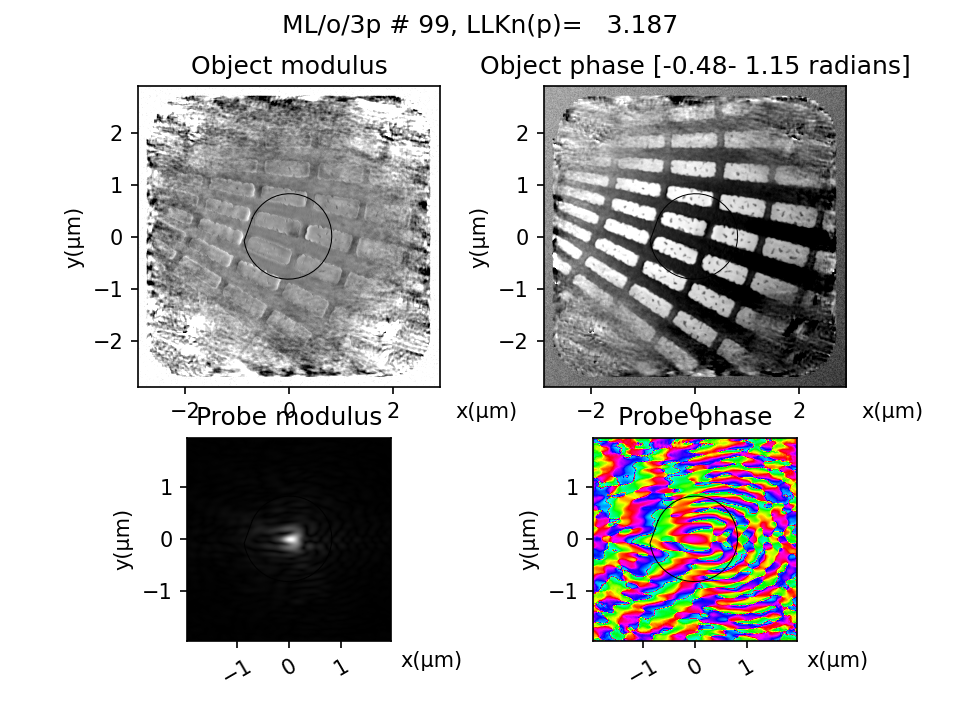

DM/o/3p    #  0 LLK=    53.94(p)   104.38(g)    94.84(e), nb photons=7.766504e+09, dt/cycle=1.228s
DM/o/3p    # 20 LLK=    10.17(p)    25.01(g)    16.87(e), nb photons=8.107360e+09, dt/cycle=0.097s
DM/o/3p    # 40 LLK=    11.05(p)    24.09(g)    18.24(e), nb photons=7.909192e+09, dt/cycle=0.068s
DM/o/3p    # 60 LLK=    14.23(p)    26.39(g)    22.96(e), nb photons=7.792917e+09, dt/cycle=0.068s
DM/o/3p    # 80 LLK=    13.06(p)    27.02(g)    21.47(e), nb photons=7.807704e+09, dt/cycle=0.068s
DM/o/3p    # 99 LLK=    13.77(p)    28.54(g)    22.80(e), nb photons=7.784918e+09, dt/cycle=0.069s
ML/o/3p    #101 LLK=     9.73(p)    44.41(g)    18.47(e), nb photons=9.648051e+09, dt/cycle=0.364s
ML/o/3p    #121 LLK=     4.45(p)    44.16(g)     8.99(e), nb photons=8.824316e+09, dt/cycle=0.101s
ML/o/3p    #141 LLK=     3.65(p)    42.80(g)     7.58(e), nb photons=8.888142e+09, dt/cycle=0.103s
ML/o/3p    #161 LLK=     3.34(p)    38.17(g)     7.11(e), nb photons=8.850578e+09, dt/cycle=0.103s
ML/o/3p   

In [5]:
plt.figure()
p = DM(update_object=True, update_probe=True, calc_llk=20, show_obj_probe=20)**100 * p
p = ML(update_object=True, update_probe=True, calc_llk=20, show_obj_probe=20)**100 * p

## Optimise object, probe and positions
This uses the AP and ML algorithms, which are more stable than DM for positions optimisations

Note the final improvement of the object near the center.

We use `pos_history=True` which will be used to plot the history of positions at the end, but this slows down the calculation as the values have to be grabbed from the GPU for each update. It's only useful to study how the algorithm works, in production it should not be used.

You can play with different parameters to tweak the position update and see how it affects the convergence:
* `update_pos=5`: update positions every N cycle. It's better for object and probe convergence to not update positions every cycle
* `pos_mult=5`: amplify the positions update. This speeds up the convergence, but can lead to unstabilities
* `pos_threshold=0.2`: this inhibits the positions update when the local object gradient \*probe is smaller than 0.2 times the average gradient for all positions. This prevents updating positions in areas of the object which are too smooth
* `min_shift`: don't update shifts when change is lower than a certain number of pixels (value has to be small as this is changes for a given cycle)
* `max_shift`: prevent too large changes per cycle. Should not be necessary, but can be safe

<IPython.core.display.Javascript object>


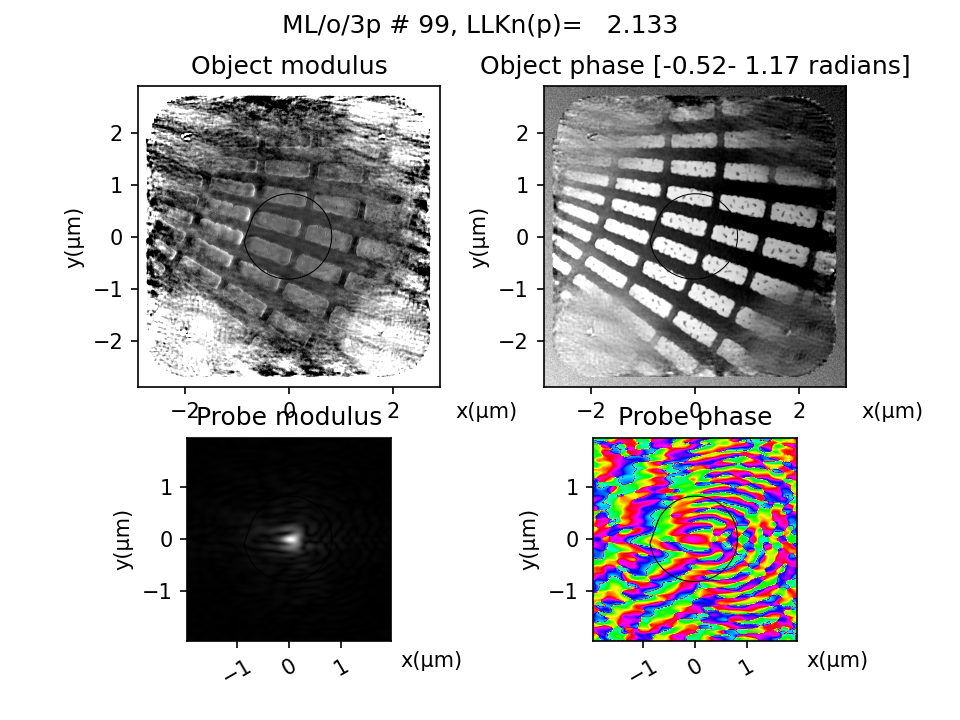

AP/o/3p/t  #201 LLK=     3.19(p)    37.82(g)     7.08(e), nb photons=8.863363e+09, dt/cycle=0.420s
AP/o/3p/t  #221 LLK=     2.77(p)    34.54(g)     5.46(e), nb photons=8.824074e+09, dt/cycle=0.050s
AP/o/3p/t  #241 LLK=     2.58(p)    34.74(g)     5.08(e), nb photons=8.813785e+09, dt/cycle=0.038s
AP/o/3p/t  #261 LLK=     2.43(p)    35.48(g)     4.79(e), nb photons=8.818874e+09, dt/cycle=0.049s
AP/o/3p/t  #281 LLK=     2.34(p)    33.51(g)     4.63(e), nb photons=8.820691e+09, dt/cycle=0.037s
AP/o/3p/t  #301 LLK=     2.29(p)    34.46(g)     4.53(e), nb photons=8.821185e+09, dt/cycle=0.048s
AP/o/3p/t  #321 LLK=     2.24(p)    33.68(g)     4.44(e), nb photons=8.822315e+09, dt/cycle=0.037s
AP/o/3p/t  #341 LLK=     2.21(p)    34.09(g)     4.37(e), nb photons=8.826194e+09, dt/cycle=0.048s
AP/o/3p/t  #361 LLK=     2.19(p)    33.20(g)     4.33(e), nb photons=8.823697e+09, dt/cycle=0.037s
AP/o/3p/t  #381 LLK=     2.17(p)    32.85(g)     4.31(e), nb photons=8.821977e+09, dt/cycle=0.048s
AP/o/3p/t 

In [6]:
plt.figure()

p = AP(update_object=True, update_probe=True, update_pos=5, pos_mult=5,
       pos_history=True, calc_llk=20, show_obj_probe=40)**200 * p
p = ML(update_object=True, update_probe=True, update_pos=5, pos_mult=5,
       pos_history=True, calc_llk=10, show_obj_probe=20)**100 * p


## Plot the position shifts
This standard plot is also created when using the `analysis` step in the algorithm with the command-line scripts. 

Shifts are represented both with arrows (scaled if necessary) and a heat map relative to the maximum shift (the color indicates the direction of the shift, the intensity the relative amplitude).

In this case the piezo motors had some trouble in the center, either because of the slow start or the quick change of direction.

Average distance between points: 0.090916 µm
Shift in positions: mean=0.022392 µm, max=0.148734µm
Scale: 0.6112681458435982


<IPython.core.display.Javascript object>


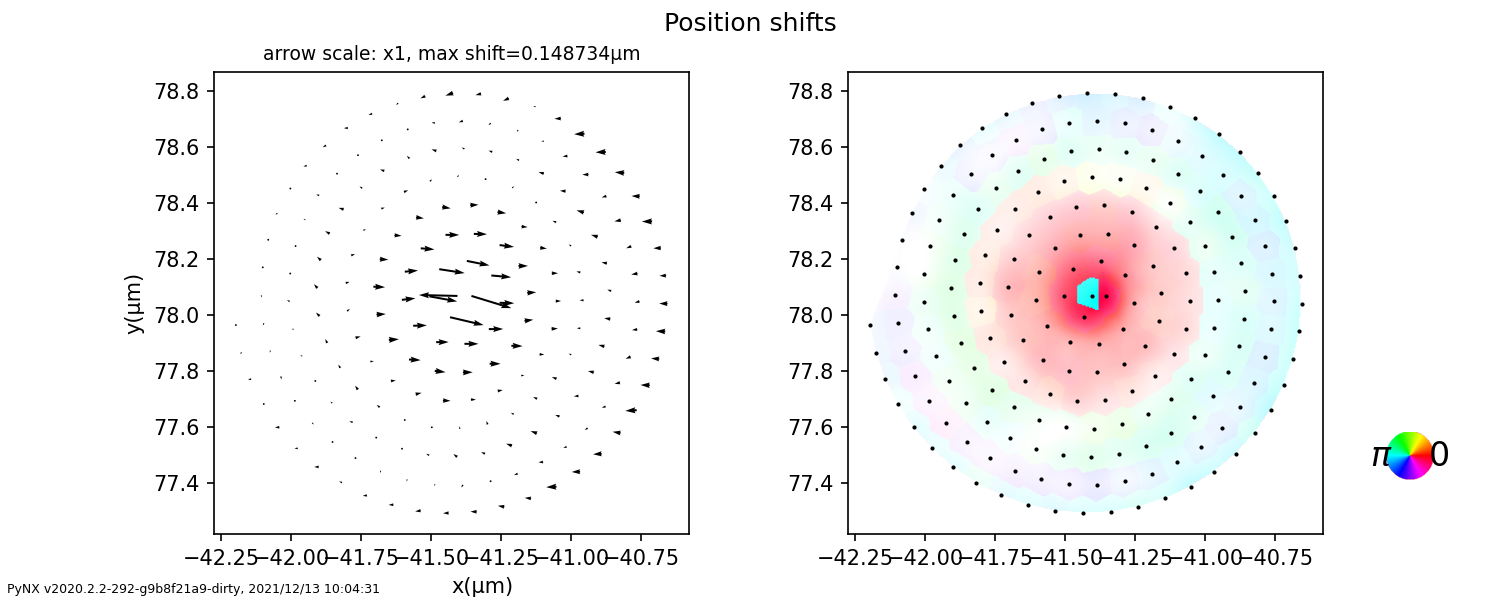

In [7]:
p = PlotPositions(show_plot=True, save_prefix=None, fig_size=(10,4)) * p

## Plot the history of position shifts near the center
We recorded the position history, so plot them for the center positions vs the cycle #. 

The position update parameters (e.g. `pos_mult`) can be modified to see how that affects convergence

<IPython.core.display.Javascript object>


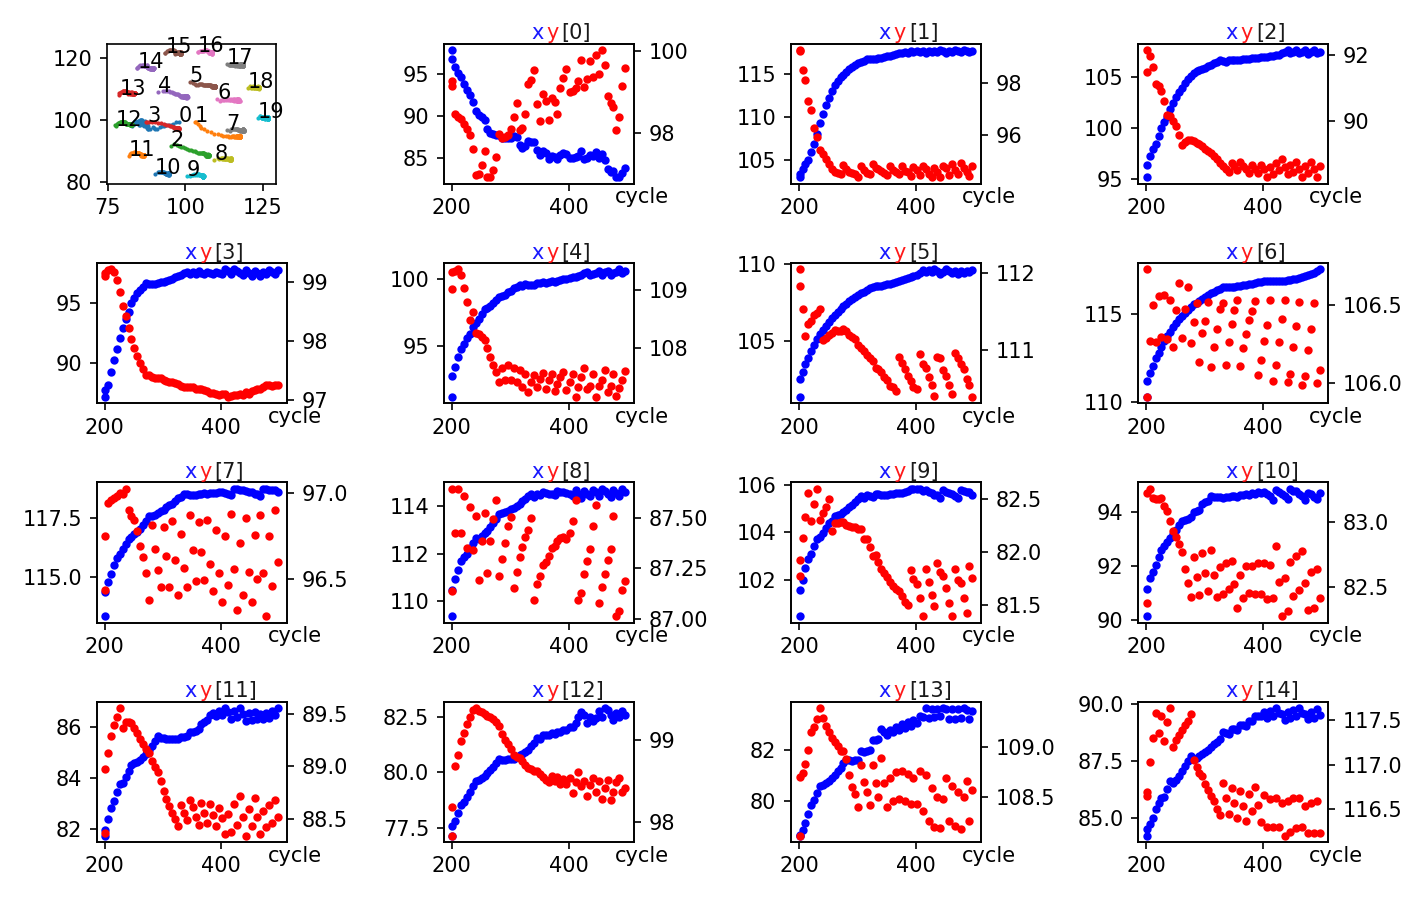

In [8]:
ipos = range(15)
fig = plt.figure(figsize=(9.5,6))
#ax = plt.axes((0.04,0.3,0.22,0.3))
plt.subplot(441)
#for i in range(default_processing_unit.get_stack_size()):
for i in range(20):
    x = [v[1] for v in p.position_history[i]]
    y = [v[2] for v in p.position_history[i]]
    plt.scatter(x,y, 1)
    plt.text(x[0], y[0], '%d' % i)
    #print("%3d  dr = %5.3f" % (i, np.sqrt((x[0]-x[-1])**2 + (y[0]-y[-1])**2)))
plt.gca().set_aspect(1)

for i in range(len(ipos)):
    #plt.subplot(4,4,2 + i // 3 * 4 + i % 3)
    plt.subplot(4,4,i+2)
    ix, x, y = [v[0] for v in p.position_history[ipos[i]]], [v[1] for v in p.position_history[ipos[i]]], \
               [v[2] for v in p.position_history[ipos[i]]]
    plt.plot(ix,x,'b.', label='x[%d]'%ipos[i])
    plt.twinx()
    plt.plot(ix,y,'r.', label='y[%d]'%ipos[i])
    plt.text(0.46, 1.03,'x', color='blue', alpha=0.9,transform=plt.gca().transAxes)
    plt.text(0.54, 1.03,'y', color='red', alpha=0.9,transform=plt.gca().transAxes)
    plt.text(0.62, 1.03,'[%d]'%ipos[i], alpha=0.9,transform=plt.gca().transAxes)
    plt.text(0.9, -.14, 'cycle',transform=plt.gca().transAxes)
plt.tight_layout()

## Free GPU memory
It is good practice in a notebook to use `FreePU()` to release memory from the GPU

In [9]:
p = FreePU() * p